# **Importing Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel("spam.xlsx")

In [ ]:
df.shape

(5571, 5)

In [ ]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


<!-- Data Cleaning
EDA
Text Preprocsssing
Model building
Evaluation
Improvement
Website
Deploy -->  

#**1. Data Cleaning**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5571 non-null   object
 1   v2          5571 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.7+ KB


In [ ]:
#drop last 3 columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace= True)

In [ ]:
df.sample(5)

,v1,v2
5518,ham,Can you pls send me that company name. In saib...
1955,ham,K...k:)why cant you come here and search job:)
3899,ham,That depends. How would you like to be treated...
2324,ham,Apps class varaya elaya.
4455,ham,Aight should I just plan to come up later toni...


In [ ]:
#renaming the columns name
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace= True )
df.sample(5)

,target,text
4909,ham,Love that holiday Monday feeling even if I hav...
1793,ham,How much i gave to you. Morning.
368,ham,Wat uniform? In where get?
338,ham,"Sorry, I'll call later"
2751,ham,Sat right? Okay thanks...


In [ ]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [ ]:
# ham = 0, spam = 1
df['target'] = encode.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#missing values
df.isnull().sum()

,0
target,0
text,0


In [ ]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [ ]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5168, 2)

# **2. EDA**

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['target'].value_counts()

,count
target,
0,4515
1,653


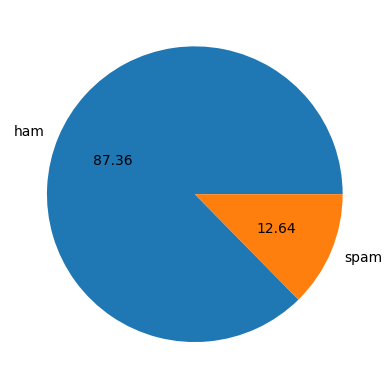

In [ ]:
#pie chart
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

Data is imbalanced

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# total no. of characters in each SMS
df['text'].astype(str)

,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5566,This is the 2nd time we have tried 2 contact u...
5567,Will Ì_ b going to esplanade fr home?
5568,"Pity, * was in mood for that. So...any other s..."
5569,The guy did some bitching but I acted like i'd...


In [ ]:
df['num_char'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
#break into small sentences
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df[['num_char', 'num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,5168.000000,5168.000000,5168.000000
mean,78.994969,18.459172,1.965751
std,58.235445,13.323834,1.448619
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
 #ham describe
df[df['target'] == 0][['num_char', 'num_words', 'num_sentence']].describe()

,num_char,num_words,num_sentence
count,4515.000000,4515.000000,4515.000000
mean,70.476855,17.127353,1.820377
std,56.359585,13.493330,1.383756
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
 #spam describe
df[df['target'] == 1][['num_char', 'num_words', 'num_sentence']].describe()

,num_char,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_char', ylabel='Count'>

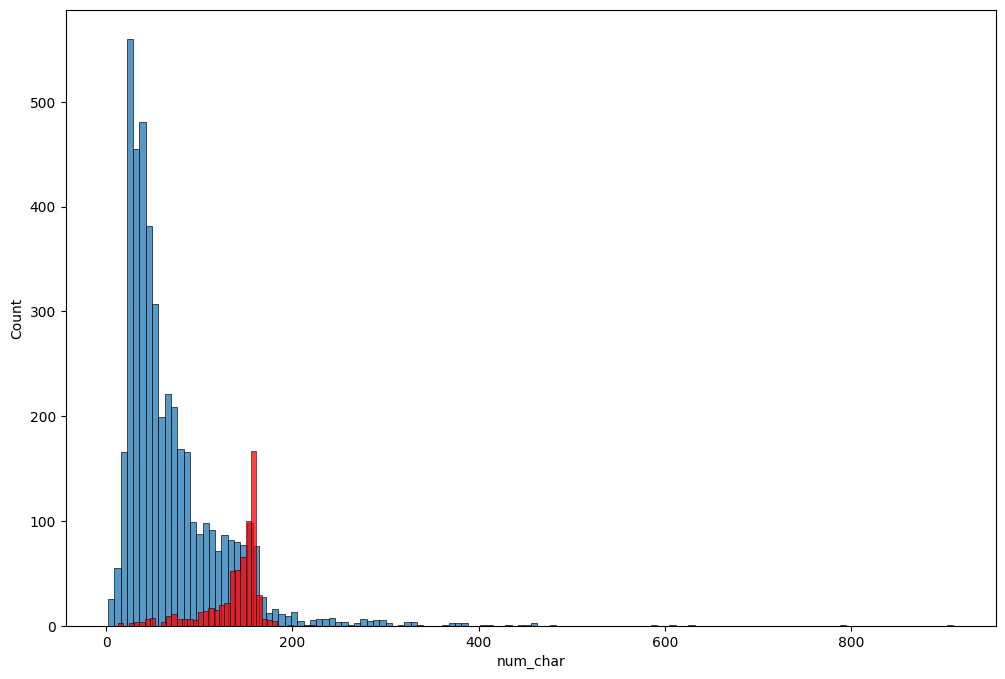

In [ ]:
plt.figure(figsize= (12,8))
sns.histplot(df[df['target'] == 0]['num_char'])
sns.histplot(df[df['target'] == 1]['num_char'], color= 'red')

<Axes: xlabel='num_words', ylabel='Count'>

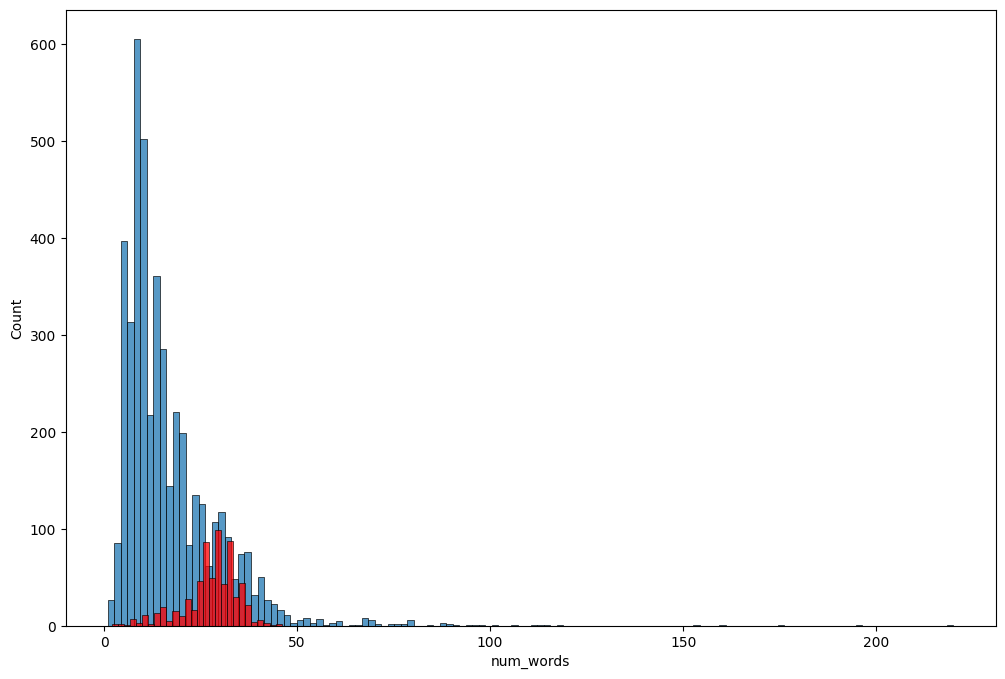

In [ ]:
plt.figure(figsize= (12,8))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color= 'red')

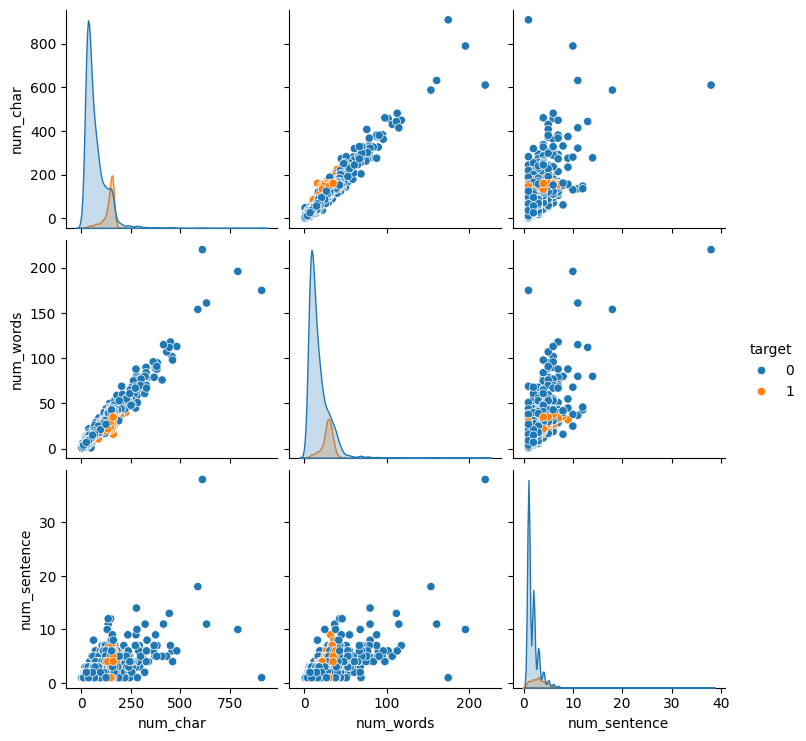

In [ ]:
sns.pairplot(df, hue= 'target')

<Axes: >

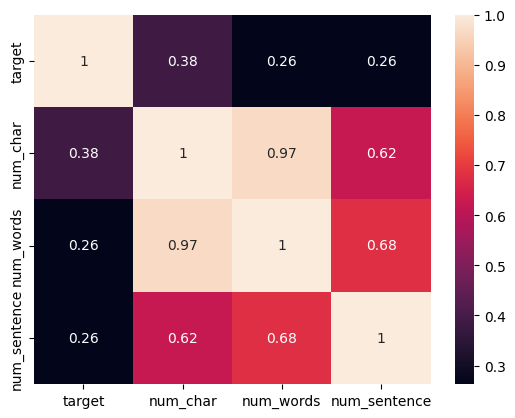

In [ ]:
sns.heatmap(df[['target', 'num_char', 'num_words', 'num_sentence']].corr(), annot = True)

# **3. Data Preprpcessing**

1. Lower case
1. Tokenization
1. Removing special characters
2. Removing stop words and punctuation
2. Stemming

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
#python function to perform all these steps

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_char,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [ ]:
#spam word cloud
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

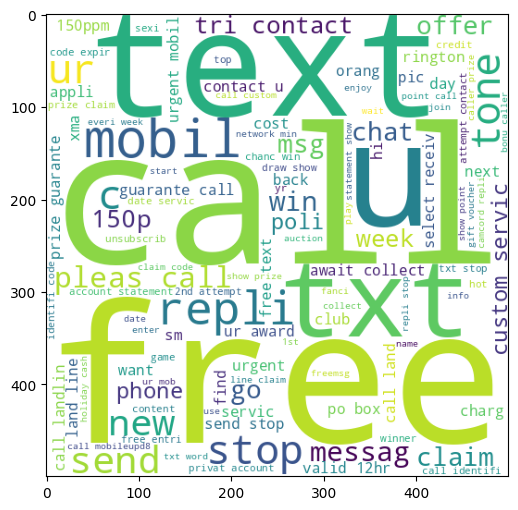

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [ ]:
#Ham word cloud
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

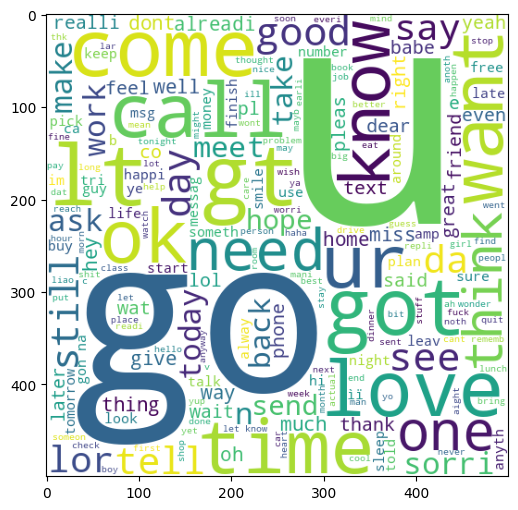

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [ ]:
#Top 30 words in sapm msg
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

9939

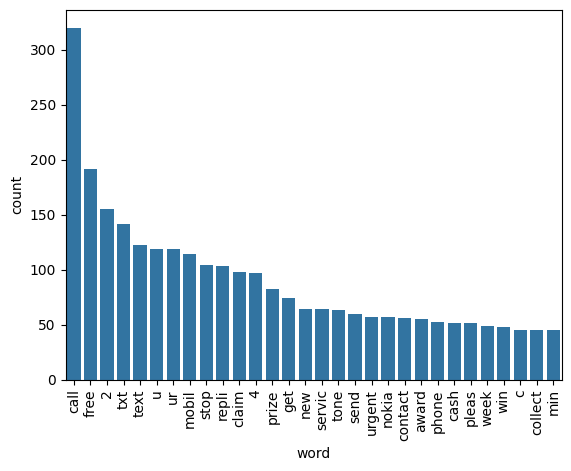

In [ ]:
from collections import Counter

# Create a DataFrame from the most common words and their counts
spam_word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot the bar chart using the DataFrame and specifying x and y
sns.barplot(x='word', y='count', data=spam_word_counts)
plt.xticks(rotation= 'vertical')
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

35401

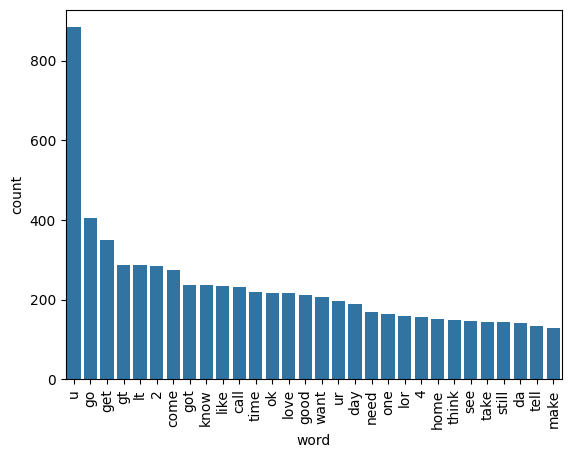

In [ ]:
from collections import Counter

# Create a DataFrame from the most common words and their counts
ham_word_counts = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot the bar chart using the DataFrame and specifying x and y
sns.barplot(x='word', y='count', data=ham_word_counts)
plt.xticks(rotation= 'vertical')
plt.show()

# **4. Model Building**

In [ ]:
df.head()

,target,text,num_char,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features= 3000)

In [ ]:
# X = cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

#Not improve thw accuracy and precision

In [ ]:
# X = np.hstack((X, df['num_char'].values.reshape(-1,1)))

In [ ]:
X.shape

(5168, 3001)

In [ ]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2, test_size = 0.2)

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

**4.1 Gaussian Naive Bayes**

In [ ]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8713733075435203
[[789 113]
 [ 20 112]]
0.49777777777777776


**4.2 Multinomial Naive Bayes**

In [ ]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9825918762088974
[[899   3]
 [ 15 117]]
0.975


**4.3 Bernoulli Naive Bayes**

In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9758220502901354
[[899   3]
 [ 22 110]]
0.9734513274336283


In [ ]:
# A = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
# A.shape

In [ ]:
# b = df['target'].values
# b

In [ ]:
# A_train, A_test, b_train, b_test = train_test_split(A,b, random_state = 2, test_size = 0.2)

In [ ]:
# gnb.fit(A_train, b_train)
# b_pred1 = gnb.predict(A_test)
# print(accuracy_score(b_test, b_pred1))
# print(confusion_matrix(b_test, b_pred1))
# print(precision_score(b_test, b_pred1))

In [ ]:
# mnb.fit(A_train, b_train)
# b_pred2 = mnb.predict(A_test)
# print(accuracy_score(b_test, b_pred2))
# print(confusion_matrix(b_test, b_pred2))
# print(precision_score(b_test, b_pred2))

In [ ]:
# bnb.fit(A_train, b_train)
# b_pred3 = bnb.predict(A_test)
# print(accuracy_score(b_test, b_pred3))
# print(confusion_matrix(b_test, b_pred3))
# print(precision_score(b_test, b_pred3))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel = 'sigmoid', gamma =1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators =50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [ ]:
clfs = {'SVC' : svc, 'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc, 'GBDT':gbdt, 'xgb':xgb}
#

In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)

  return accuracy, precision

In [ ]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.965183752417795, 0.9137931034482759)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
  print("For ", name)
  print("Accuracy - ", current_accuracy)
  print("Precision - ", current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.965183752417795
Precision -  0.9137931034482759
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9825918762088974
Precision -  0.975
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8409090909090909
For  LR
Accuracy -  0.9593810444874274
Precision -  0.95
For  RF
Accuracy -  0.9642166344294004
Precision -  0.9439252336448598
For  AdaBoost
Accuracy -  0.9284332688588007
Precision -  0.8717948717948718
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8739495798319328
For  ETC
Accuracy -  0.9700193423597679
Precision -  0.954954954954955
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.9333333333333333
For  xgb
Accuracy -  0.9622823984526112
Precision -  0.9428571428571428


In [ ]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending = False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.982592,0.975000
8,ETC,0.970019,0.954955
4,LR,0.959381,0.950000
5,RF,0.964217,0.943925
10,xgb,0.962282,0.942857
9,GBDT,0.947776,0.933333
0,SVC,0.965184,0.913793
7,BgC,0.958414,0.873950
6,AdaBoost,0.928433,0.871795


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.982592
2,ETC,Accuracy,0.970019
3,LR,Accuracy,0.959381
4,RF,Accuracy,0.964217
5,xgb,Accuracy,0.962282
6,GBDT,Accuracy,0.947776
7,SVC,Accuracy,0.965184
8,BgC,Accuracy,0.958414
9,AdaBoost,Accuracy,0.928433


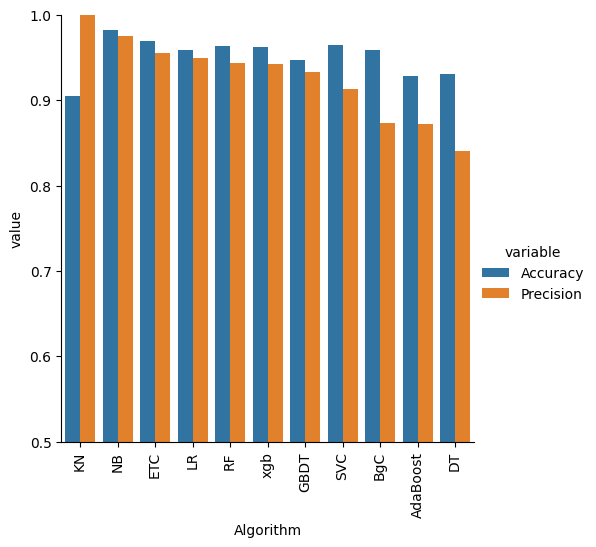

In [ ]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5,1)
plt.xticks(rotation = 'vertical')
plt.show()

# **Model Improve**

In [ ]:
# 1 Change the max_features parameter of IfIdf

In [ ]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores}).sort_values('Precision_max_ft_3000', ascending = False)

In [ ]:
new_df = performance_df.merge(temp_df, on = 'Algorithm')

In [ ]:
temp_df1 = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_scaling': accuracy_scores, 'Precision_scaling': precision_scores}).sort_values('Precision_scaling', ascending = False)

In [ ]:
new_df_scaled = new_df.merge(temp_df1, on = 'Algorithm')

In [ ]:
temp_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [ ]:
new_df_scaled.merge(temp_df2,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.982592,0.975000,0.982592,0.975000,0.982592,0.975000,0.982592,0.975000
2,ETC,0.970019,0.954955,0.970019,0.954955,0.970019,0.954955,0.970019,0.954955
3,LR,0.959381,0.950000,0.959381,0.950000,0.959381,0.950000,0.959381,0.950000
4,RF,0.964217,0.943925,0.964217,0.943925,0.964217,0.943925,0.964217,0.943925
5,xgb,0.962282,0.942857,0.962282,0.942857,0.962282,0.942857,0.962282,0.942857
6,GBDT,0.947776,0.933333,0.947776,0.933333,0.947776,0.933333,0.947776,0.933333
7,SVC,0.965184,0.913793,0.965184,0.913793,0.965184,0.913793,0.965184,0.913793
8,BgC,0.958414,0.873950,0.958414,0.873950,0.958414,0.873950,0.958414,0.873950
9,AdaBoost,0.928433,0.871795,0.928433,0.871795,0.928433,0.871795,0.928433,0.871795


In [ ]:
performance_df.merge(temp_df, on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.982592,0.975000,0.982592,0.975000
2,ETC,0.970019,0.954955,0.970019,0.954955
3,LR,0.959381,0.950000,0.959381,0.950000
4,RF,0.964217,0.943925,0.964217,0.943925
5,xgb,0.962282,0.942857,0.962282,0.942857
6,GBDT,0.947776,0.933333,0.947776,0.933333
7,SVC,0.965184,0.913793,0.965184,0.913793
8,BgC,0.958414,0.873950,0.958414,0.873950
9,AdaBoost,0.928433,0.871795,0.928433,0.871795


In [ ]:
# Voting Classifier

svc = SVC(kernel = 'sigmoid', gamma = 1, probability= True )
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators= 50, random_state= 2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators= [('svm', svc), ('nb', mnb), ('et', etc)], voting = 'soft')

In [ ]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1, kernel='sigmoid', probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9806576402321083
Precision 0.9745762711864406


In [ ]:
# applying stacking
from sklearn.ensemble import StackingClassifier
estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [ ]:
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [ ]:
clf.fit(X_train, y_train)



StackingClassifier(estimators=[('svm',
                                SVC(gamma=1, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('et',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [ ]:
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9816247582205029
Precision 0.9747899159663865


In [ ]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))